# Validação Cruzada / Cross Validation

Validação cruzada é uma técnica de validação de modelos para avaliar como os resultados de uma análise estatística serão generalizados para um conjunto de dados independente. 

É usada principalmente em cenários em que o objetivo é a predição e se deseja estimar a precisão com que um modelo preditivo funcionará na prática.

## Tipos
- Não exaustiva:
    - Holdout (1 execução)
    - k-Fold (k execuções)    
- Exaustiva: 
    - Leave-p-out (LpO CV - (n-p) execuções)
    - Leave-one-out (LOO CV - (n-1) execuções)


In [2]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import datasets

## Geração do conjunto de dados

In [3]:
rand = np.random.RandomState(42)

X = np.empty((12,2), dtype=int)
X[:, 0] = np.arange(12)
X[:, 1] = rand.randint(0, 100, 12)
y = np.concatenate((np.zeros(6, int), np.ones(6, int)))

print("X", X)
print("y", y)

df = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'y': y})
df

X [[ 0 51]
 [ 1 92]
 [ 2 14]
 [ 3 71]
 [ 4 60]
 [ 5 20]
 [ 6 82]
 [ 7 86]
 [ 8 74]
 [ 9 74]
 [10 87]
 [11 99]]
y [0 0 0 0 0 0 1 1 1 1 1 1]


,X0,X1,y
0,0,51,0
1,1,92,0
2,2,14,0
3,3,71,0
4,4,60,0
5,5,20,0
6,6,82,1
7,7,86,1
8,8,74,1
9,9,74,1


## Validação Cruzada Holdout

Na validação cruzada típica, os resultados de várias execuções de teste de modelo são calculados em média.
Já, o método de validação envolve uma única execução.

Ver de forma mais didática no Jupyter Notebook entitulado Introdução.

In [4]:
n = X.shape[0]
perc_train = 2/3
idx_train = np.arange(n * perc_train, dtype=int)
idx_test = np.arange(n * perc_train, n, dtype=int)

rand = np.random.RandomState(42)
indices = np.arange(X.shape[0])
rand.shuffle(indices)
X_ = X[indices]
y_ = y[indices]

X_train = X_[idx_train]
y_train = y_[idx_train]
X_test = X_[idx_test]
y_test = y_[idx_test]
print("X_train:\n", X_train)
print("y_train:", y_train)
print("X_test:", X_test)
print("y_test:", y_test)

X_train:
 [[10 87]
 [ 9 74]
 [ 0 51]
 [ 8 74]
 [ 5 20]
 [ 2 14]
 [ 1 92]
 [11 99]]
y_train: [1 1 0 1 0 0 0 1]
X_test: [[ 4 60]
 [ 7 86]
 [ 3 71]
 [ 6 82]]
y_test: [0 1 0 1]


## Validação Cruzada Holdout usando o scikit

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=2/3, 
                                                    random_state=42, shuffle=True, stratify=y)
print("X_train:\n", X_train)
print("y_train:\n", y_train)
print("X_test:", X_test)
print("y_test:", y_test)

X_train:
 [[ 0 51]
 [ 1 92]
 [ 6 82]
 [ 2 14]
 [ 9 74]
 [ 8 74]
 [ 5 20]
 [ 7 86]]
y_train:
 [0 0 1 0 1 1 0 1]
X_test: [[10 87]
 [11 99]
 [ 3 71]
 [ 4 60]]
y_test: [1 1 0 0]


## Validação Cruzada Holdout com estratificação dos labels usando o scikit

In [5]:
X_train, y_train, X_test, y_test = model_selection.train_test_split(X, y, train_size=2/3, 
                                                    random_state=42, shuffle=True, stratify=y)
print("X_train:\n", X_train)
print("y_train:\n", y_train)
print("X_test:", X_test)
print("y_test:", y_test)

X_train:
 [[ 0 51]
 [ 1 92]
 [ 6 82]
 [ 2 14]
 [ 9 74]
 [ 8 74]
 [ 5 20]
 [ 7 86]]
y_train:
 [[10 87]
 [11 99]
 [ 3 71]
 [ 4 60]]
X_test: [0 0 1 0 1 1 0 1]
y_test: [1 1 0 0]


## Validação Cruzada com k-Fold

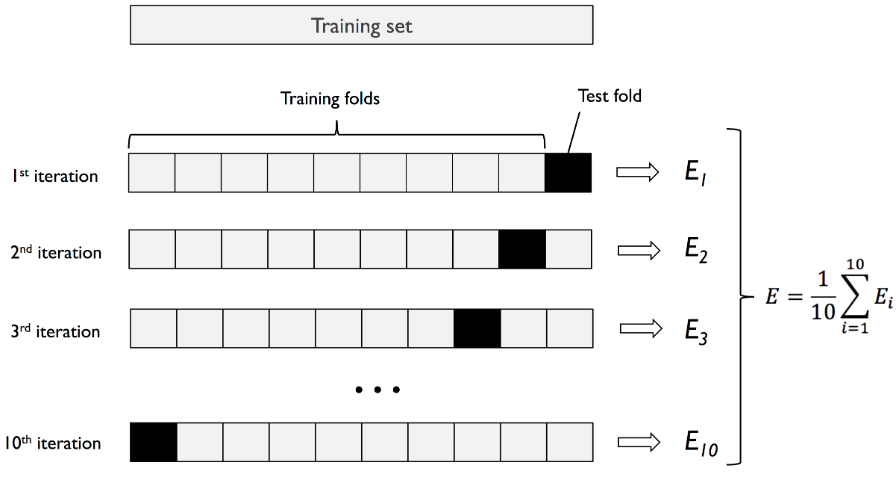

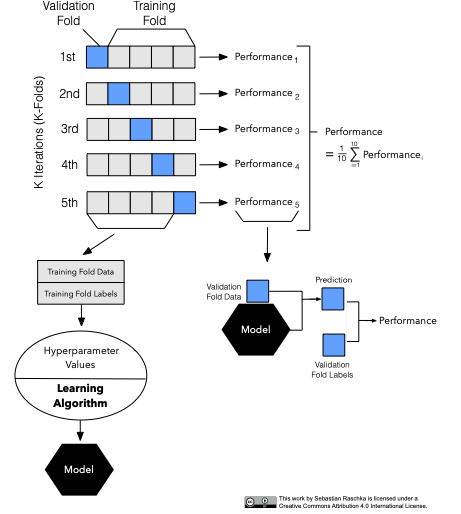

### Passos detalhados:

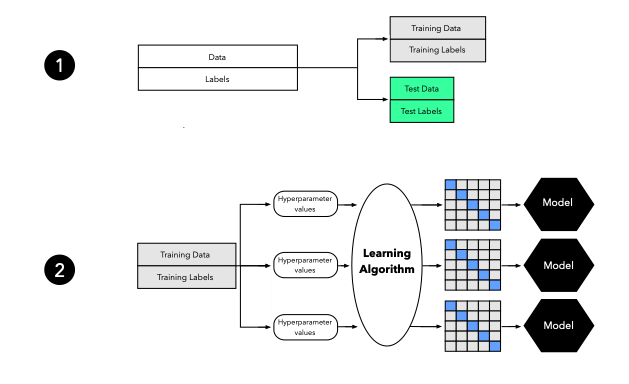

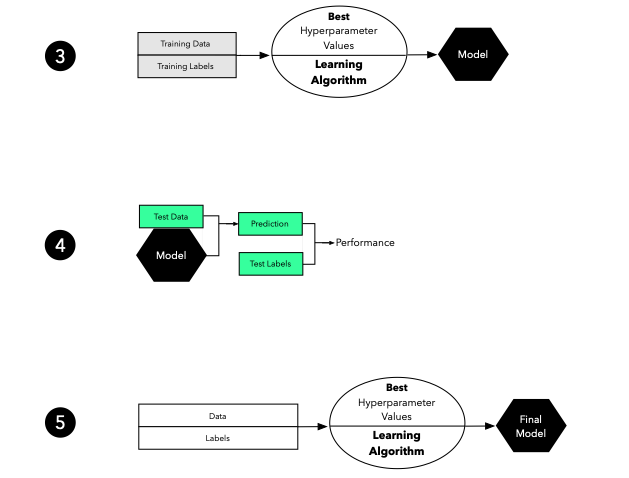

### K-Fold sem scikit

In [9]:
# definição de índices de cada fold
k = 3
size = X.shape[0]
fold_size = size // k
curr = 0
all_idx = np.arange(0, size)
p =  [None] * k
idx_train = [None] * k
idx_val  = [None] * k

for i in range(k):
    prev = curr
    curr += fold_size
    p[i] = np.arange(prev, curr)
    idx_val[i] = p[i]
    diff = np.setdiff1d(all_idx, p[i])
    idx_train[i] = diff
    n = idx_train[i].shape[0] + idx_val[i].shape[0]
    print("Fold", i)
    print(idx_train[i].shape, idx_val[i].shape, n)
    print(idx_train[i], idx_val[i])
    X_train = X[idx_train[i]]
    y_train = y[idx_train[i]]
    X_test = X[idx_val[i]]
    y_test = y[idx_val[i]]
    print("X_train:\n", X_train)
    print("y_train:\n", y_train)
    print("X_test:", X_test)
    print("y_test:", y_test)
    print()

Fold 0
(8,) (4,) 12
[ 4  5  6  7  8  9 10 11] [0 1 2 3]
X_train:
 [[ 4 60]
 [ 5 20]
 [ 6 82]
 [ 7 86]
 [ 8 74]
 [ 9 74]
 [10 87]
 [11 99]]
y_train:
 [0 0 1 1 1 1 1 1]
X_test: [[ 0 51]
 [ 1 92]
 [ 2 14]
 [ 3 71]]
y_test: [0 0 0 0]

Fold 1
(8,) (4,) 12
[ 0  1  2  3  8  9 10 11] [4 5 6 7]
X_train:
 [[ 0 51]
 [ 1 92]
 [ 2 14]
 [ 3 71]
 [ 8 74]
 [ 9 74]
 [10 87]
 [11 99]]
y_train:
 [0 0 0 0 1 1 1 1]
X_test: [[ 4 60]
 [ 5 20]
 [ 6 82]
 [ 7 86]]
y_test: [0 0 1 1]

Fold 2
(8,) (4,) 12
[0 1 2 3 4 5 6 7] [ 8  9 10 11]
X_train:
 [[ 0 51]
 [ 1 92]
 [ 2 14]
 [ 3 71]
 [ 4 60]
 [ 5 20]
 [ 6 82]
 [ 7 86]]
y_train:
 [0 0 0 0 0 0 1 1]
X_test: [[ 8 74]
 [ 9 74]
 [10 87]
 [11 99]]
y_test: [1 1 1 1]



### K-Fold com scikit

In [7]:
kfold = model_selection.KFold(n_splits=3, shuffle=False)
k = 0
for idx_train, idx_val in kfold.split(X, y):
    print("Fold", k)
    k += 1
    print(idx_train.shape, idx_val.shape, idx_train.shape[0] + idx_val.shape[0])
    print(idx_train, idx_val)
    print("X_train:", X[idx_train])
    print("y_train:", y[idx_train])
    print("X_val:", X[idx_val])
    print("y_val:", y[idx_val])
    print()

Fold 0
(8,) (4,) 12
[ 4  5  6  7  8  9 10 11] [0 1 2 3]
X_train: [[ 4 60]
 [ 5 20]
 [ 6 82]
 [ 7 86]
 [ 8 74]
 [ 9 74]
 [10 87]
 [11 99]]
y_train: [0 0 1 1 1 1 1 1]
X_val: [[ 0 51]
 [ 1 92]
 [ 2 14]
 [ 3 71]]
y_val: [0 0 0 0]

Fold 1
(8,) (4,) 12
[ 0  1  2  3  8  9 10 11] [4 5 6 7]
X_train: [[ 0 51]
 [ 1 92]
 [ 2 14]
 [ 3 71]
 [ 8 74]
 [ 9 74]
 [10 87]
 [11 99]]
y_train: [0 0 0 0 1 1 1 1]
X_val: [[ 4 60]
 [ 5 20]
 [ 6 82]
 [ 7 86]]
y_val: [0 0 1 1]

Fold 2
(8,) (4,) 12
[0 1 2 3 4 5 6 7] [ 8  9 10 11]
X_train: [[ 0 51]
 [ 1 92]
 [ 2 14]
 [ 3 71]
 [ 4 60]
 [ 5 20]
 [ 6 82]
 [ 7 86]]
y_train: [0 0 0 0 0 0 1 1]
X_val: [[ 8 74]
 [ 9 74]
 [10 87]
 [11 99]]
y_val: [1 1 1 1]



### KFold com Shuffle

In [8]:
kfold = model_selection.KFold(n_splits=3, shuffle=True, random_state=42)
k = 0
for idx_train, idx_val in kfold.split(X, y):
    print("Fold", k)
    k += 1
    print(idx_train.shape, idx_val.shape, idx_train.shape[0] + idx_val.shape[0])
    print(idx_train, idx_val)
    print("X_train:", X[idx_train])
    print("y_train:", y[idx_train])
    print("X_val:", X[idx_val])
    print("y_val:", y[idx_val])
    print()

Fold 0
(8,) (4,) 12
[ 1  2  3  4  5  6  7 11] [ 0  8  9 10]
X_train: [[ 1 92]
 [ 2 14]
 [ 3 71]
 [ 4 60]
 [ 5 20]
 [ 6 82]
 [ 7 86]
 [11 99]]
y_train: [0 0 0 0 0 1 1 1]
X_val: [[ 0 51]
 [ 8 74]
 [ 9 74]
 [10 87]]
y_val: [0 1 1 1]

Fold 1
(8,) (4,) 12
[ 0  3  4  6  7  8  9 10] [ 1  2  5 11]
X_train: [[ 0 51]
 [ 3 71]
 [ 4 60]
 [ 6 82]
 [ 7 86]
 [ 8 74]
 [ 9 74]
 [10 87]]
y_train: [0 0 0 1 1 1 1 1]
X_val: [[ 1 92]
 [ 2 14]
 [ 5 20]
 [11 99]]
y_val: [0 0 0 1]

Fold 2
(8,) (4,) 12
[ 0  1  2  5  8  9 10 11] [3 4 6 7]
X_train: [[ 0 51]
 [ 1 92]
 [ 2 14]
 [ 5 20]
 [ 8 74]
 [ 9 74]
 [10 87]
 [11 99]]
y_train: [0 0 0 0 1 1 1 1]
X_val: [[ 3 71]
 [ 4 60]
 [ 6 82]
 [ 7 86]]
y_val: [0 0 1 1]



### KFold Estratificado

In [9]:
kfold = model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
k = 0
for idx_train, idx_val in kfold.split(X, y):
    print("Fold", k)
    k += 1
    print(idx_train.shape, idx_val.shape, idx_train.shape[0] + idx_val.shape[0])
    print(idx_train, idx_val)
    print("X_train:", X[idx_train])
    print("y_train:", y[idx_train])
    print("X_val:", X[idx_val])
    print("y_val:", y[idx_val])
    print()

Fold 0
(8,) (4,) 12
[ 2  3  4  5  7  8 10 11] [0 1 6 9]
X_train: [[ 2 14]
 [ 3 71]
 [ 4 60]
 [ 5 20]
 [ 7 86]
 [ 8 74]
 [10 87]
 [11 99]]
y_train: [0 0 0 0 1 1 1 1]
X_val: [[ 0 51]
 [ 1 92]
 [ 6 82]
 [ 9 74]]
y_val: [0 0 1 1]

Fold 1
(8,) (4,) 12
[ 0  1  3  4  6  9 10 11] [2 5 7 8]
X_train: [[ 0 51]
 [ 1 92]
 [ 3 71]
 [ 4 60]
 [ 6 82]
 [ 9 74]
 [10 87]
 [11 99]]
y_train: [0 0 0 0 1 1 1 1]
X_val: [[ 2 14]
 [ 5 20]
 [ 7 86]
 [ 8 74]]
y_val: [0 0 1 1]

Fold 2
(8,) (4,) 12
[0 1 2 5 6 7 8 9] [ 3  4 10 11]
X_train: [[ 0 51]
 [ 1 92]
 [ 2 14]
 [ 5 20]
 [ 6 82]
 [ 7 86]
 [ 8 74]
 [ 9 74]]
y_train: [0 0 0 0 1 1 1 1]
X_val: [[ 3 71]
 [ 4 60]
 [10 87]
 [11 99]]
y_val: [0 0 1 1]



### Stratified Shuffle Split

In [10]:
shufflesplit = model_selection.StratifiedShuffleSplit(n_splits=3, test_size=1/3, random_state=42)
k = 0
for idx_train, idx_val in shufflesplit.split(X, y):
    print("Fold", k)
    k += 1
    print(idx_train.shape, idx_val.shape, idx_train.shape[0] + idx_val.shape[0])
    print(idx_train, idx_val)
    print("X_train:", X[idx_train])
    print("y_train:", y[idx_train])
    print("X_val:", X[idx_val])
    print("y_val:", y[idx_val])
    print()

Fold 0
(8,) (4,) 12
[0 1 6 2 9 8 5 7] [10 11  3  4]
X_train: [[ 0 51]
 [ 1 92]
 [ 6 82]
 [ 2 14]
 [ 9 74]
 [ 8 74]
 [ 5 20]
 [ 7 86]]
y_train: [0 0 1 0 1 1 0 1]
X_val: [[10 87]
 [11 99]
 [ 3 71]
 [ 4 60]]
y_val: [1 1 0 0]

Fold 1
(8,) (4,) 12
[ 6  5  2  8 11  0 10  4] [1 3 7 9]
X_train: [[ 6 82]
 [ 5 20]
 [ 2 14]
 [ 8 74]
 [11 99]
 [ 0 51]
 [10 87]
 [ 4 60]]
y_train: [1 0 0 1 1 0 1 0]
X_val: [[ 1 92]
 [ 3 71]
 [ 7 86]
 [ 9 74]]
y_val: [0 0 1 1]

Fold 2
(8,) (4,) 12
[11  4  9 10  3  1  0  7] [8 6 2 5]
X_train: [[11 99]
 [ 4 60]
 [ 9 74]
 [10 87]
 [ 3 71]
 [ 1 92]
 [ 0 51]
 [ 7 86]]
y_train: [1 0 1 1 0 0 0 1]
X_val: [[ 8 74]
 [ 6 82]
 [ 2 14]
 [ 5 20]]
y_val: [1 1 0 0]

